# Import Package and Data

In [1]:
from ca_model import simulate_tumor_growth
from analyze import delay_coordinates_reconstruction
from read_data import read_history
import matplotlib.pyplot as plt

In [2]:
GENERATIONS = 500
K1, K2 = 0.74, 0.2

In [3]:
history_csv_file = '../data/history_data.csv'
history_array = []
history_array = read_history(history_array, history_csv_file)

Importing completed, there are 100 history entries in total


# Compare Tau = 0 and Tau = 9

In [4]:
# time delay = 0
history_no_delay = history_array[0]

In [5]:
# time delay = 9
history_delay = history_array[9]

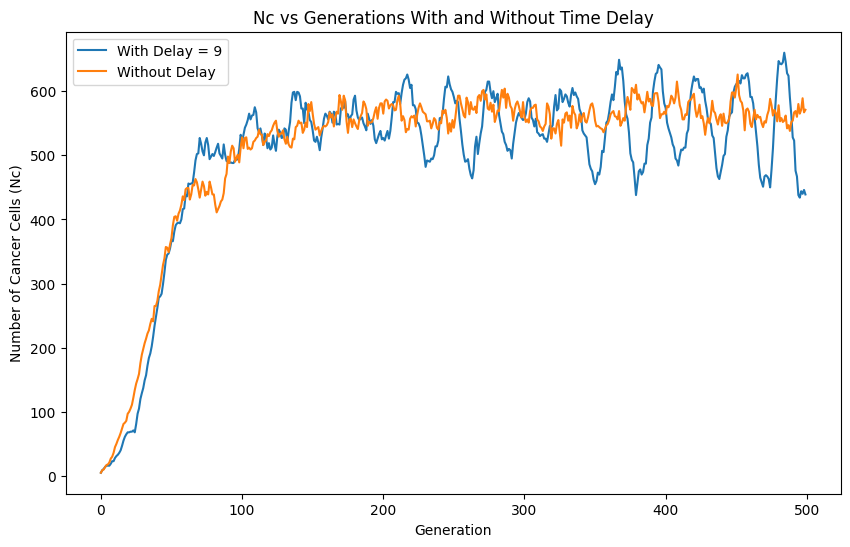

In [6]:
generations = list(range(GENERATIONS))
Nc_with_delay = [int(history_delay[g]['Nc']) for g in generations]
Nc_without_delay = [int(history_no_delay[g]['Nc']) for g in generations]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label='With Delay = 9')
plt.plot(generations, Nc_without_delay, label='Without Delay')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()


# The Influence of Large τ and Delay-coordinate Reconstruction

In [7]:
GENERATIONS = 1500

In [8]:
'''Get Nc with delay and Nc without delay'''

history_no_delay = simulate_tumor_growth(0, GENERATIONS, K1, K2)

# tau, which is time delay = 20
history_delay = simulate_tumor_growth(20, GENERATIONS, K1, K2)

generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

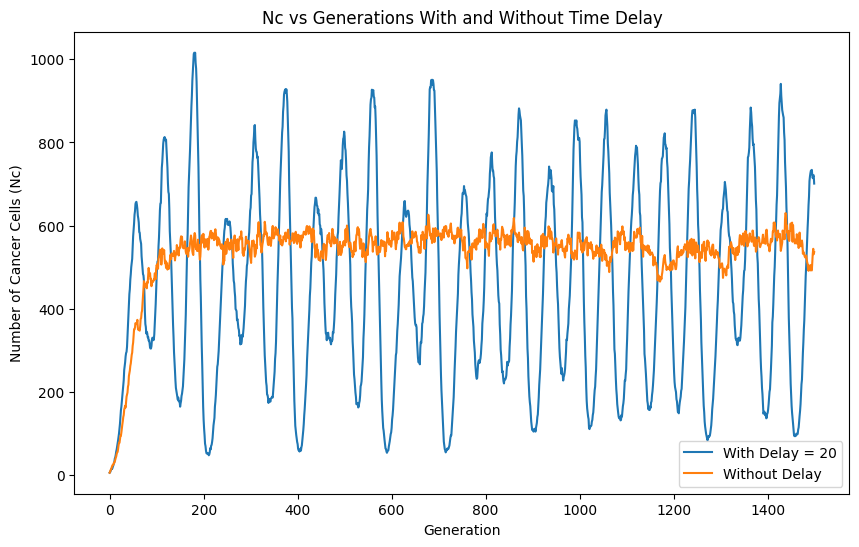

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label='With Delay = 20')
plt.plot(generations, Nc_without_delay, label='Without Delay')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()

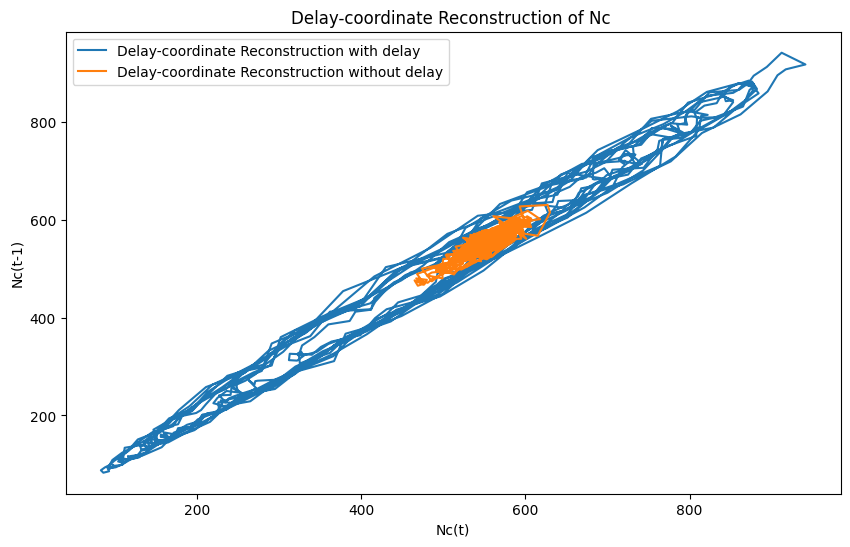

In [10]:
Nc_with_delay = Nc_with_delay[800:-1]
reconstructed_data_with_delay = delay_coordinates_reconstruction(Nc_with_delay, 1, 2)

Nc_without_delay = Nc_without_delay[800:-1]
reconstructed_data_without_delay = delay_coordinates_reconstruction(Nc_without_delay, 1, 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reconstructed_data_with_delay[:, 1], reconstructed_data_with_delay[:, 0], label = "Delay-coordinate Reconstruction with delay")
plt.plot(reconstructed_data_without_delay[:, 1], reconstructed_data_without_delay[:, 0], label = "Delay-coordinate Reconstruction without delay")


plt.xlabel('Nc(t)')
plt.ylabel('Nc(t-1)')
plt.title('Delay-coordinate Reconstruction of Nc ')
plt.legend()
plt.show()


# Compare Nc between Tau in [0, 10, 20, 30, 40, 50]

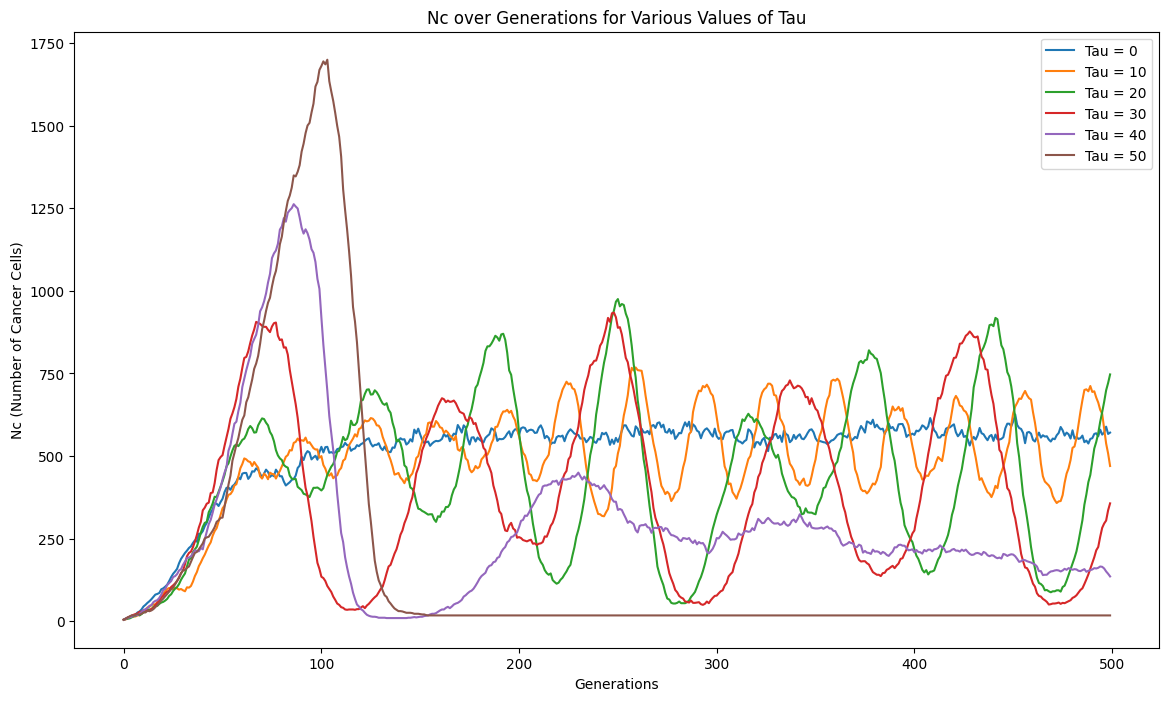

In [11]:

# Set the range of tau values and generations
tau_values = range(0, 100)  # Tau from 0 to 100
selected_tau_values = [0, 10, 20, 30, 40, 50]
generations = range(500)  # 500 generations

# # Initialize a dictionary to hold Nc for each tau value
# history_array = {}

# # Simulate tumor growth for each value of tau
# for tau in selected_tau_values:
#     history_for_tau[tau] = simulate_tumor_growth(tau, 500, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

# Now, you can plot Nc for various values of tau over generations
# Choose specific tau values to plot, or plot them all if you prefer

plt.figure(figsize=(14, 8))

# Plot Nc for the selected tau values
for tau in selected_tau_values:
    Nc_values = [int(history_array[tau][g]['Nc']) for g in generations]
    plt.plot(generations, Nc_values, label=f'Tau = {tau}')

plt.xlabel('Generations')
plt.ylabel('Nc (Number of Cancer Cells)')
plt.title('Nc over Generations for Various Values of Tau')
plt.legend()
plt.show()


# 3D Plot for How Nc Increase during 500 Generations for Different Taus

0
10
20
30
40
50
60
70
80
90
10
[[  5   9  10 ... 589 567 571]
 [  5   6   9 ... 538 508 470]
 [  5   7   8 ... 699 721 747]
 ...
 [  5   9  13 ...  44  44  44]
 [  5   7   9 ...  62  62  62]
 [  5   8  12 ...  78  78  78]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (500, 10) and arg 2 with shape (10, 500).

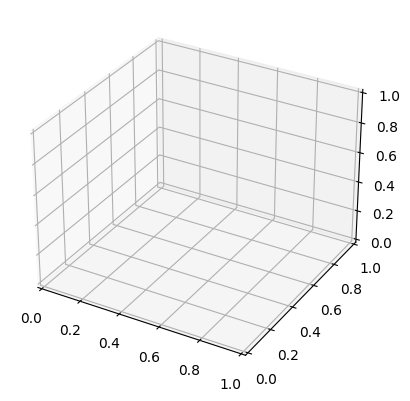

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parameters for the simulation
GENERATIONS = 500  # Set your desired number of generations
time_delays = range(0, 100, 10)  # Values of tau to simulate


# Initialize an empty array to store the results
results = []

# Loop over different values of tau and simulate the tumor growth
for tau in time_delays:
    print(tau)
    history_delay = history_array[tau]
    generations = list(range(GENERATIONS))
    list_Nc = [int(history_delay[g]['Nc']) for g in generations]
#     print(list_Nc)
    results.append(list_Nc)

# Convert the results to a numpy array for easy manipulation
results = np.array(results)
print(len(results))
print(results)

# Create a meshgrid for the 3D plot
tau_values, generation_values = np.meshgrid(time_delays, generations)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(tau_values, generation_values, results, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Tau')
ax.set_ylabel('Generations')
ax.set_zlabel('Nc')

# Show the plot
plt.show()


In [ ]:
# previous codes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parameters for the simulation
GENERATIONS = 500  # Set your desired number of generations
time_delays = range(0, 100, 10)  # Values of tau to simulate


# Initialize an empty array to store the results
results = []

# Loop over different values of tau and simulate the tumor growth
for tau in time_delays:
    history_delay = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    generations = list(range(GENERATIONS))
    list_Nc = [history_delay[g]['Nc'] for g in generations]
    results.append(list_Nc)

# Convert the results to a numpy array for easy manipulation
results = np.array(results)

# Create a meshgrid for the 3D plot
tau_values, generation_values = np.meshgrid(time_delays, generations)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(tau_values, generation_values, results, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Tau')
ax.set_ylabel('Generations')
ax.set_zlabel('Nc')

# Show the plot
plt.show()
